In [1]:
import torch
from torch import nn
import ch3
import FashionMnistTool as fmt

模型

In [2]:
net = nn.Sequential(nn.Flatten(), 
                    nn.Linear(784, 256), nn.ReLU(), 
                    nn.Linear(256, 10))

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)

net.apply(init_weights)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=256, bias=True)
  (2): ReLU()
  (3): Linear(in_features=256, out_features=10, bias=True)
)

In [3]:
batch_size, lr, num_epochs = 256, 0.1, 10
loss = nn.CrossEntropyLoss(reduction='none')
trainer = torch.optim.SGD(net.parameters(), lr=lr)

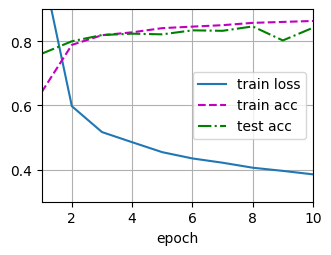

In [4]:
train_iter, test_iter = fmt.load_data_fashion_mnist(batch_size)
ch3.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)